# 3i005 - Projet 3 - 2021nov
# Chaines de Markov et épidémiologie : propagation d’une épidémie dans une population
L’objectif de ce projet est de manipuler des chaînes de Markov pour étudier la propagation d’une
épidémie dans une population. Votre rendu sera un notebook, il est attendu que les codes soient
commentés et les résultats interprétés. Les packages random et matplotlib sont conseillés.


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from copy import copy, deepcopy
from collections import Counter

# 1 Apprentissage des paramètres d’un modèle à partir de données
# Question 1
A partir de cette séquence d’observation, estimez de les probabilités de transition entre les états et
dresser la matrice de probabilité de transitions.


In [2]:
matrice = np.array([[2/3,1/3,0],[0,5/6,1/6],[0,0,1]])
print(matrice)

[[0.66666667 0.33333333 0.        ]
 [0.         0.83333333 0.16666667]
 [0.         0.         1.        ]]


# Question 2
Nous avons ensuite suivit une population de 100 individus, pendant 200 jours. Pour lire les données
utiliser np.loadtxt(‘data_exo1.txt’). Les individus sains sont note 0, les infecté 1 et les guéris 2.
1. Lire des données
2. Estimez les probabilités de transition entre les états et dressez la matrice de probabilité de transitions
(indice pour vérifier vos résultats : la première ligne de la matrice est [0.924, 0.076, 0.])


In [3]:
np.loadtxt("data_exo1.txt")

array([[0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [0., 1., 1., ..., 2., 2., 2.],
       [0., 0., 1., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.]])

# 2 Description du modèle
# Question 1
Créez la matrice de transition A, la matrice contenant les probabilités de transition entre les différents états.  
Créez une fonction permettant de vérifier qu’une matrice est stochastique.  
Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.

In [4]:
A = np.array([[0.92,0.08,0],[0,0.93,0.07],[0,0,1]])
print(A)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.   0.   1.  ]]


In [5]:
def matrice_stoch(matrice):
    """
    Vérifie si une matrice est stochastique ou non
    """
    if len(matrice) != len(matrice[0]):
        return False
    for i in range(len(matrice)):
        cpt = 0
        for j in range(len(matrice[0])):
            cpt += matrice[i][j]
            if matrice[i][j] < 0:
                return False
        if cpt != 1:
            return False
    
    return True

In [6]:
def verif_matrice_stoch(matrice):
    if matrice_stoch(matrice):
        print("La matrice est stochastique")
    else:
        print("La matrice n'est pas stochastique")

In [7]:
verif_matrice_stoch(A)

La matrice est stochastique


# Question 2
Créez Π0 la distribution de probabilité initiale.  

In [8]:
Π0 = [0.9, 0.1, 0]
print(Π0)

[0.9, 0.1, 0]


# Distribution
# Question 1
En utilisant π0 et A, donnez la probabilité pour un individu d’être sain, infecté ou guéri au temps t = 1

In [9]:
def proba_t1(Π,matrice):
    """
    Return la proba de l'état d'un individu au temps t = 1
    """
    if matrice_stoch(matrice) == False:
        return 
    distrib_prob = np.array([0.0,0.0,0.0])
    for i in range(len(matrice[0])):
        for j in range(len(matrice)):
            distrib_prob[i] += Π[j] * matrice[j][i]
    return distrib_prob

In [10]:
proba_t1(Π0,A)

array([0.828, 0.165, 0.007])

# Question 2
De même pour chaque temps t entre 1 et 200, calculez la distribution théorique des effectifs dans chaque état

In [11]:
def proba_t(Π,matrice,t):
    """
    Return la proba des états pour un temps t 
    """
    if t < 1 or t > 200 :
        return 
    distrib_prob = Π
    for i in range(t):
        distrib_prob = proba_t1(distrib_prob,matrice)
    return distrib_prob   

In [12]:
proba_t(Π0,A,200)

array([5.15000889e-08, 3.21804899e-06, 9.99996730e-01])

# Question 3
Représentez graphiquement la probabilité d’être dans chaque état en fonction du temps

In [13]:
def graph_distrib(Π,matrice,t):
    """
    Return un graph de la proba de chaque état en fonction du temps t
    """
    distrib_prob = Π
    s = list()
    i = list()
    r = list()
    liste = list()
    for j in range(t):
        liste.append(j)
        s.append(distrib_prob[0])
        r.append(distrib_prob[2])
        i.append(distrib_prob[1])
        distrib_prob = proba_t1(distrib_prob,matrice)
    fig, ax = plt.subplots()
    ax.plot(liste,s,label = "sain.e.s")
    ax.plot(liste,i,label = "infecté.e.s")
    ax.plot(liste,r,label = "guéri.e.s")
    plt.xlabel('Temps')
    plt.ylabel('Nombre de personnes dans chaque catégorie')
    plt.legend(loc='best')
    plt.show()
    plt.close()

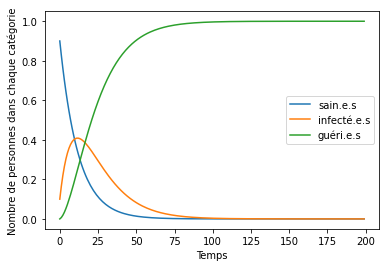

In [14]:
graph_distrib(Π0,A,200)

Quand t est grand, la proportion des individus sains et infectés tend vers 0, quand a celle des individus guéris, elle tend vers le nombre total d'individus dans la population, c'est-à-dire plus t est grand, plus la probabilité qu'il n'y ait que des individus guéris dans la population à l'instant t est proche de 1.

# Tirage aléatoire des états
Vous allez générer une séquence de taille T en utilisant cette chaîne de Markov. Pour générer une
séquence aléatoire, choisissiez un état initial au hasard (en utilisant π0) ; puis choisissez les états suivants
en suivant les probabilités de transition (= la matrice de transition A).
Vous pouvez prendre T=150.

In [15]:
def tirage(matrice,T,Π):
    """
    Return une séquence de taiile T d'états aléatoirement 
    """ 
    tirage = random.choices(['S','I','R'],Π) 
    for i in range((T-1)):
        if tirage[i] == 'S':
            tirage += random.choices(['S','I','R'],matrice[0])
        else:
            if tirage[i] == 'I':
                tirage += random.choices(['S','I','R'],matrice[1])
            else: 
                tirage += random.choices(['S','I','R'],matrice[2])
    return tirage

In [16]:
print(tirage(A,150,Π0))

['S', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R']


# Modélisation d’une population
# Question 1
A chaque temps t, comptez le nombre d’individus sains, infectés et guéris dans la population et
affichez l’évolution du nombre d’individus dans les trois états en fonction du temps.


In [17]:
def GenerateRandomPopulation(population,matrice,T,Π):
    """
    Return un dictionnaire dont la clé correspond au temps et la valeur à un dictionnaire dont sa clé
    correspont a l'etat (S,I,R) et sa valeur au nombre d'individus dans chaque categorie S I R  
    """
    random_sequence = "" 

    states = dict()  
    for i in range(T): 
        states[i] = {"S":0,"I":0,"R":0} 

    for individu in range(population): 
        random_sequence = tirage(matrice,T,Π) 
        
        for etat_i in range(len(random_sequence)): 
            if random_sequence[etat_i] == "S": 
                states[etat_i]["S"] += 1 
            elif random_sequence[etat_i] == "I": 
                states[etat_i]["I"] += 1 
            else:
                if random_sequence[etat_i] == "R": 
                    states[etat_i]["R"] += 1 
    
    return states

In [18]:
population = GenerateRandomPopulation(200,A,150,Π0)
print(population)

{0: {'S': 172, 'I': 28, 'R': 0}, 1: {'S': 166, 'I': 33, 'R': 1}, 2: {'S': 156, 'I': 43, 'R': 1}, 3: {'S': 133, 'I': 63, 'R': 4}, 4: {'S': 120, 'I': 74, 'R': 6}, 5: {'S': 109, 'I': 77, 'R': 14}, 6: {'S': 104, 'I': 78, 'R': 18}, 7: {'S': 93, 'I': 82, 'R': 25}, 8: {'S': 87, 'I': 83, 'R': 30}, 9: {'S': 80, 'I': 84, 'R': 36}, 10: {'S': 78, 'I': 84, 'R': 38}, 11: {'S': 73, 'I': 83, 'R': 44}, 12: {'S': 62, 'I': 87, 'R': 51}, 13: {'S': 55, 'I': 89, 'R': 56}, 14: {'S': 51, 'I': 87, 'R': 62}, 15: {'S': 49, 'I': 78, 'R': 73}, 16: {'S': 45, 'I': 78, 'R': 77}, 17: {'S': 43, 'I': 74, 'R': 83}, 18: {'S': 40, 'I': 72, 'R': 88}, 19: {'S': 37, 'I': 70, 'R': 93}, 20: {'S': 36, 'I': 66, 'R': 98}, 21: {'S': 30, 'I': 67, 'R': 103}, 22: {'S': 27, 'I': 67, 'R': 106}, 23: {'S': 26, 'I': 65, 'R': 109}, 24: {'S': 25, 'I': 63, 'R': 112}, 25: {'S': 23, 'I': 62, 'R': 115}, 26: {'S': 20, 'I': 62, 'R': 118}, 27: {'S': 19, 'I': 58, 'R': 123}, 28: {'S': 18, 'I': 55, 'R': 127}, 29: {'S': 18, 'I': 47, 'R': 135}, 30: {'S'

# Question 2
Affichez le pourcentage d’individus sains infectés et guéris en fonction du temps.

In [19]:
def graph(dic,T):
    """
    Return un graph représantant l'évolution du nombre d'individus dans les trois états en fonction du temps 
    """
    temps = [i for i in range(T)] # intervalle de temps ([0,T[)
    # Des listes S I R pour les intervalles des nombres d'individus de la population dans chaque état. 
    S = [dic[t]["S"] for t in dic]
    I = [dic[t]["I"] for t in dic]
    R = [dic[t]["R"] for t in dic]

    fig, ax = plt.subplots()
    ax.plot(temps,S,label = "sain.e.s")
    ax.plot(temps,I,label = "infecté.e.s")
    ax.plot(temps,R,label = "guéri.e.s")
    plt.title("Nombre d'individus dans chaque état en fonction du temps",loc='center')
    plt.xlabel("Temps")
    plt.ylabel("Nombre de personnes dans chaque catégorie")
    plt.legend(loc='best')
    plt.show()
    plt.close()

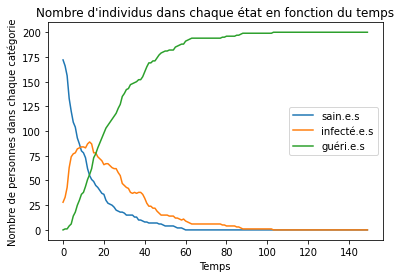

In [20]:
graph(population,150)

# Question 3
Quand t est grand, quelle est la proportion d’individus sains, infectés et guéris ?


In [21]:
def percentage(part,total):
    """
    Fonction de pourcentage 
    """
    return 100 * part/total

def proportion(dic,t,total):
    """ 
    Return la proportion d’individus sains, infectés et guéris.
    """
    sains = percentage(dic[t-1]["S"],total)
    infectes = percentage(dic[t-1]["I"],total)
    gueris = percentage(dic[t-1]["R"],total)
    print("Sains : ",sains, "% -- Infectés : ", infectes, "% -- Guéris : ", gueris, "%")

In [22]:
proportion(population,150,200)

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %


Quand t est grand, la proportion des individus sains et infectés tend vers 0, quand a celle des individus guéris, elle tend vers le nombre total d'individus dans la population, c'est-à-dire plus t est grand, plus la probabilité qu'il n'y ait que des individus guéris dans la population à l'instant t est proche de 1.

# Question 4
Refaites les questions précédentes avec des populations de tailles différentes, 5 individus et 5000
individus par exemple.

In [23]:
population1 = GenerateRandomPopulation(5,A,150,Π0)
population2 = GenerateRandomPopulation(5000,A,150,Π0)

In [24]:
print(population1)

{0: {'S': 5, 'I': 0, 'R': 0}, 1: {'S': 5, 'I': 0, 'R': 0}, 2: {'S': 5, 'I': 0, 'R': 0}, 3: {'S': 5, 'I': 0, 'R': 0}, 4: {'S': 5, 'I': 0, 'R': 0}, 5: {'S': 5, 'I': 0, 'R': 0}, 6: {'S': 5, 'I': 0, 'R': 0}, 7: {'S': 5, 'I': 0, 'R': 0}, 8: {'S': 5, 'I': 0, 'R': 0}, 9: {'S': 5, 'I': 0, 'R': 0}, 10: {'S': 4, 'I': 1, 'R': 0}, 11: {'S': 3, 'I': 2, 'R': 0}, 12: {'S': 3, 'I': 2, 'R': 0}, 13: {'S': 1, 'I': 4, 'R': 0}, 14: {'S': 1, 'I': 4, 'R': 0}, 15: {'S': 1, 'I': 4, 'R': 0}, 16: {'S': 1, 'I': 4, 'R': 0}, 17: {'S': 1, 'I': 4, 'R': 0}, 18: {'S': 1, 'I': 4, 'R': 0}, 19: {'S': 1, 'I': 3, 'R': 1}, 20: {'S': 1, 'I': 1, 'R': 3}, 21: {'S': 1, 'I': 1, 'R': 3}, 22: {'S': 1, 'I': 1, 'R': 3}, 23: {'S': 1, 'I': 1, 'R': 3}, 24: {'S': 1, 'I': 1, 'R': 3}, 25: {'S': 1, 'I': 1, 'R': 3}, 26: {'S': 1, 'I': 1, 'R': 3}, 27: {'S': 1, 'I': 1, 'R': 3}, 28: {'S': 1, 'I': 1, 'R': 3}, 29: {'S': 1, 'I': 1, 'R': 3}, 30: {'S': 1, 'I': 1, 'R': 3}, 31: {'S': 1, 'I': 1, 'R': 3}, 32: {'S': 1, 'I': 1, 'R': 3}, 33: {'S': 1, 'I': 1

In [25]:
print(population2)

{0: {'S': 4490, 'I': 510, 'R': 0}, 1: {'S': 4145, 'I': 812, 'R': 43}, 2: {'S': 3848, 'I': 1061, 'R': 91}, 3: {'S': 3562, 'I': 1280, 'R': 158}, 4: {'S': 3273, 'I': 1472, 'R': 255}, 5: {'S': 2995, 'I': 1649, 'R': 356}, 6: {'S': 2749, 'I': 1786, 'R': 465}, 7: {'S': 2515, 'I': 1894, 'R': 591}, 8: {'S': 2309, 'I': 1959, 'R': 732}, 9: {'S': 2103, 'I': 2017, 'R': 880}, 10: {'S': 1955, 'I': 2014, 'R': 1031}, 11: {'S': 1806, 'I': 2002, 'R': 1192}, 12: {'S': 1646, 'I': 2029, 'R': 1325}, 13: {'S': 1519, 'I': 2000, 'R': 1481}, 14: {'S': 1405, 'I': 1961, 'R': 1634}, 15: {'S': 1273, 'I': 1939, 'R': 1788}, 16: {'S': 1183, 'I': 1895, 'R': 1922}, 17: {'S': 1102, 'I': 1854, 'R': 2044}, 18: {'S': 1017, 'I': 1807, 'R': 2176}, 19: {'S': 930, 'I': 1745, 'R': 2325}, 20: {'S': 859, 'I': 1693, 'R': 2448}, 21: {'S': 792, 'I': 1635, 'R': 2573}, 22: {'S': 705, 'I': 1613, 'R': 2682}, 23: {'S': 649, 'I': 1547, 'R': 2804}, 24: {'S': 610, 'I': 1475, 'R': 2915}, 25: {'S': 560, 'I': 1431, 'R': 3009}, 26: {'S': 511, 'I'

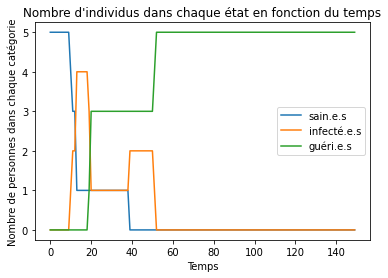

In [26]:
graph(population1,150)

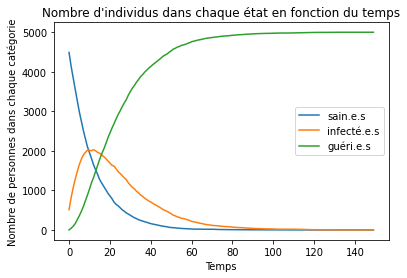

In [27]:
graph(population2,150)

In [28]:
proportion(population1,1,5)

Sains :  100.0 % -- Infectés :  0.0 % -- Guéris :  0.0 %


In [29]:
proportion(population1,50,5)

Sains :  0.0 % -- Infectés :  40.0 % -- Guéris :  60.0 %


In [30]:
proportion(population1,150,5)

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %


In [31]:
proportion(population2,1,5000)

Sains :  89.8 % -- Infectés :  10.2 % -- Guéris :  0.0 %


In [32]:
proportion(population2,50,5000)

Sains :  1.32 % -- Infectés :  8.82 % -- Guéris :  89.86 %


In [33]:
proportion(population2,150,5000)

Sains :  0.0 % -- Infectés :  0.0 % -- Guéris :  100.0 %


# Pic de l’épidémie
# Question 1
Au pic de l’épidémie, combien d’individus sont infectés ? A quel temps se produit le pic ?

In [34]:
def dicoPic(dic,t,state):
    """
    Prend le dictionnaire et trouve le plus grand I avec son t correspondant
    """
    state_dic = {t:dic[t][state] for t in dic} #dictionnaire des états et leurs temps correspondant seulement
    max_value = max(state_dic.values()) 
    max_key = 0 
    for key, value in state_dic.items():
        if max_value == value : 
            max_key = key
            break 
    return {max_key : max_value}

def pic(dic,t,state):
    """
    Trouve le nombre d'individus infectés et le temps du pic 
    """
    max_infectes = dicoPic(dic,t,state) 
    cle = list(max_infectes.keys()) 
    valeur = list(max_infectes.values()) 
    temps = cle[0]
    nombre = valeur[0]
    print("Nombre d'individus",state,":", nombre, "-- Le temps de production du pic :", temps)

In [35]:
pic(population,150,"I")

Nombre d'individus I : 89 -- Le temps de production du pic : 13


# Longueur de l’infection
# Question 1
À partir des simulations, estimez la longueur moyenne d’une séquence de I

In [36]:
def moyenneInd(list_sequences,state):
    """
    Return la moyenne pour une personne 
    """
    somme_seq = 0
    somme_list = 0
    
    for sequence in list_sequences: 
        somme_seq = sequence.count(state) #nombre d'occurence de la chaine state dans la chaine sequence 
        somme_list += somme_seq #somme de toute les nombres occurences
    
    return somme_list/len(list_sequences)

def generateManySequences(matrice,T,distrib_prob,number):
    """
    Fonction qui génére plusieurs sequences et les stock dans une liste 
    """   
    list_seq = []
    for i in range(number):
        new_seq = tirage(matrice,T,distrib_prob) 
        list_seq.append(new_seq) 
    return list_seq

In [37]:
listSqI = generateManySequences(A,150,Π0,200)
moyIndI = moyenneInd(listSqI,"I")
print("La longeur moyenne d'une séquence de I pour un individu est: ",moyIndI)

La longeur moyenne d'une séquence de I pour un individu est:  14.09


# Question 2
Calculez la longueur théorique d’une séquence de I en fonction de la probabilité de rester infecté, si
on est infecté au temps précédent (vous pourrez utiliser l’espérance de la loi géométrique).


D'après l’espérance de la loi géométrique de paramètre p, la probabilité de rester infecté, si on est infecté au temps précédent, est 1/p.

In [38]:
longueurTheorique = 1/A[1][2]
print("La longueur théorique d'une infection est de ",longueurTheorique)

La longueur théorique d'une infection est de  14.285714285714285


# Question 3
Affichez la distribution théorique et la distribution observée de la longueur d’infection.


# 3  Modèle ergodique
Nous allons maintenant considérer un second modèle, les individus guéris peuvent redevenir sains avec
une probabilité de 0.02. Ils-elles peuvent perdre leur immunité face à la maladie.

# Analyse du modèle
# Question 1
Créez la nouvelle matrice de transition, et les nouvelles simulations. Comment la population évoluet-elle si un individu guérit peut redevenir infecté ?

In [39]:
B = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.02,0,0.98]])
print(B)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


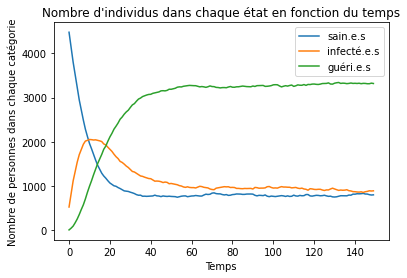

Sains :  15.9 % -- Infectés :  17.72 % -- Guéris :  66.38 %
Nombre d'individus I : 2050 -- Le temps de production du pic : 10


In [40]:
ergo = GenerateRandomPopulation(5000,B,150,Π0)
graph(ergo,150)
proportion(ergo,150,5000)
pic(ergo,150,"I")

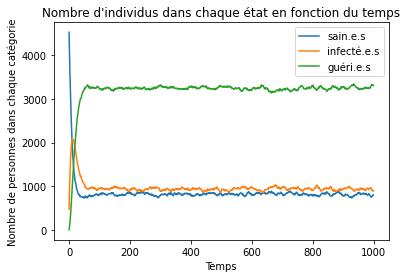

Sains :  15.96 % -- Infectés :  17.92 % -- Guéris :  66.12 %
Nombre d'individus I : 2068 -- Le temps de production du pic : 14


In [41]:
ergoGrand = GenerateRandomPopulation(5000,B,1000,Π0)
graph(ergoGrand,1000)
proportion(ergoGrand,1000,5000)
pic(ergoGrand,1000,"I")

On remarque que l'évolution se stabilise a partir de t = 50, on a 2/4 des personnes guéris et 1/4 sont soit sain, soit infecté

# Question 2
Refaites les simulations avec une autre distribution de probabilité initiale, par exemple si au temps
t = 0, nous avons 90% d’infectés et 10% de sains. Explorez d’autres initialisations et commentez
vos observations.

In [42]:
Π1 = [0.1,0.9,0]
print(Π1)

[0.1, 0.9, 0]


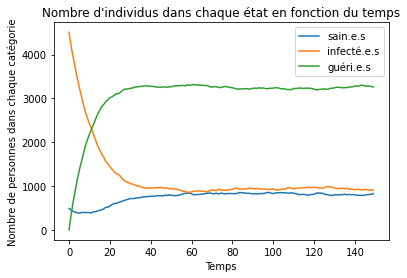

Sains :  16.56 % -- Infectés :  18.22 % -- Guéris :  65.22 %
Nombre d'individus I : 4510 -- Le temps de production du pic : 0


In [43]:
ergoNew = GenerateRandomPopulation(5000,B,150,Π1)
graph(ergoNew,150)
proportion(ergoNew,150,5000)
pic(ergoNew,150,"I")

In [44]:
def randomInitialisations(number,population,t):
    """
    Cette fonction genere aléatoirement des nouvelles distributions initiale et appelle la fonction graph
    pour afficher leurs evolutions
    """
    for i in range(number):    
        s = np.random.rand()
        i = np.random.rand()
        r = np.random.rand()
        Π0_random = [s,i,r]
        print ("Pour une distribution initial de ", s*100, "% sains, ", i*100, "% infectés et ", r*100, "% guéris")
        ergoDico_random = GenerateRandomPopulation(population,B,t,Π0_random)
        graph(ergoDico_random,t)
        proportion(ergoDico_random,t,population)
        pic(ergoDico_random,t,"I")
        print("\n")
    

Pour une distribution initial de  84.79800947309515 % sains,  71.43006214705268 % infectés et  85.2565839633681 % guéris


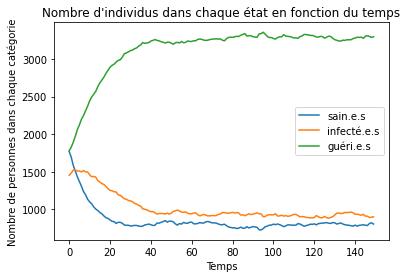

Sains :  16.06 % -- Infectés :  18.02 % -- Guéris :  65.92 %
Nombre d'individus I : 1522 -- Le temps de production du pic : 2


Pour une distribution initial de  5.499489155967597 % sains,  38.82792752925924 % infectés et  11.986559278448416 % guéris


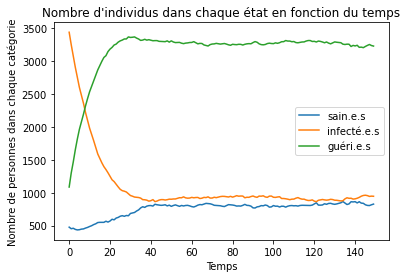

Sains :  16.54 % -- Infectés :  18.92 % -- Guéris :  64.54 %
Nombre d'individus I : 3437 -- Le temps de production du pic : 0


Pour une distribution initial de  76.6208558536728 % sains,  80.4294421401154 % infectés et  89.83152898712949 % guéris


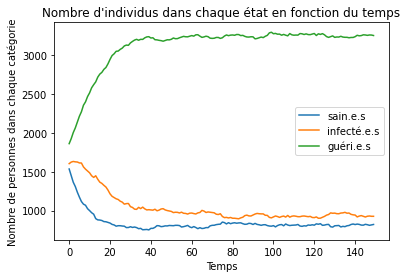

Sains :  16.44 % -- Infectés :  18.54 % -- Guéris :  65.02 %
Nombre d'individus I : 1632 -- Le temps de production du pic : 2


Pour une distribution initial de  0.48184433922077163 % sains,  10.381171881214502 % infectés et  89.8795770583032 % guéris


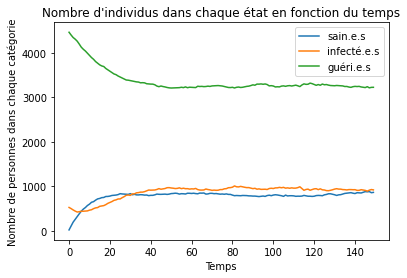

Sains :  17.22 % -- Infectés :  18.34 % -- Guéris :  64.44 %
Nombre d'individus I : 1006 -- Le temps de production du pic : 81


Pour une distribution initial de  29.167806654412775 % sains,  38.680763822471945 % infectés et  33.75385151817577 % guéris


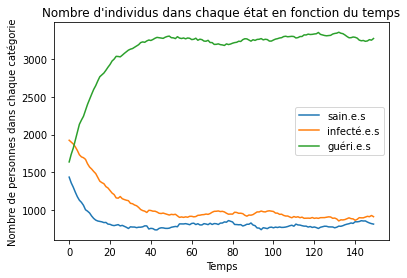

Sains :  16.3 % -- Infectés :  18.26 % -- Guéris :  65.44 %
Nombre d'individus I : 1925 -- Le temps de production du pic : 0


Pour une distribution initial de  80.99572455235962 % sains,  33.75155013972619 % infectés et  50.6662578814762 % guéris


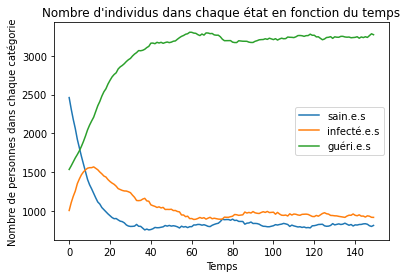

Sains :  16.22 % -- Infectés :  18.3 % -- Guéris :  65.48 %
Nombre d'individus I : 1567 -- Le temps de production du pic : 12


Pour une distribution initial de  92.8045636865477 % sains,  32.5919738327352 % infectés et  72.73553865346534 % guéris


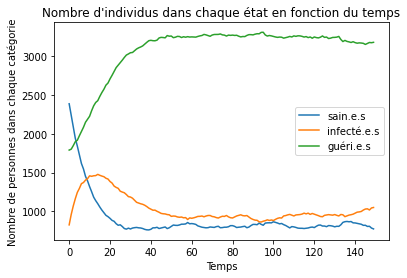

Sains :  15.46 % -- Infectés :  20.98 % -- Guéris :  63.56 %
Nombre d'individus I : 1476 -- Le temps de production du pic : 14


Pour une distribution initial de  15.7717025261371 % sains,  48.56715989239111 % infectés et  93.45053873012546 % guéris


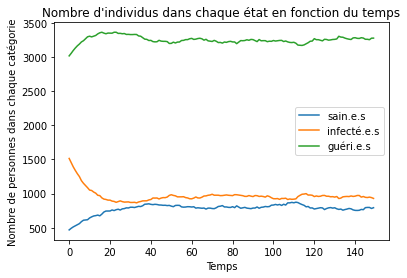

Sains :  15.88 % -- Infectés :  18.6 % -- Guéris :  65.52 %
Nombre d'individus I : 1515 -- Le temps de production du pic : 0


Pour une distribution initial de  48.60467203544824 % sains,  40.636400086408386 % infectés et  95.74201864304638 % guéris


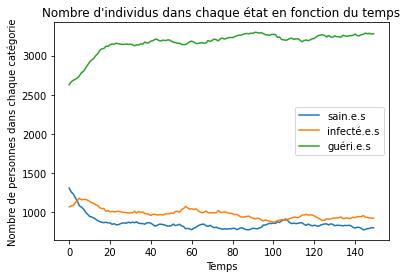

Sains :  15.96 % -- Infectés :  18.46 % -- Guéris :  65.58 %
Nombre d'individus I : 1178 -- Le temps de production du pic : 5


Pour une distribution initial de  49.34324521866581 % sains,  71.74997322340487 % infectés et  20.744645194022905 % guéris


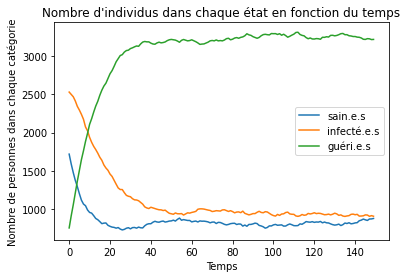

Sains :  17.5 % -- Infectés :  18.08 % -- Guéris :  64.42 %
Nombre d'individus I : 2531 -- Le temps de production du pic : 0




In [45]:
randomInitialisations(10,5000,150)

On remarque qu'importe la distribution de probabilité initiale prise, à un temps t les probabilité de S, I et R converge vers les meme valeurs constantes

# Question 3
Quels est la nature des états de cette chaîne de Markov ? Est-elle périodique ? Est-elle irréductible ?

La probabilité qu'un individu dans un certain état reste dans ce même état à un autre instant est supérieure à 0.5 dans chaque cas, c'est donc la transition la plus probable.  
Chacun de ces états sont récurrent car ils peuvent revenir dans cette état et positif car ils sont plus probable de garder le même état que d'en changer.  
Pour chaque état on a une transition sur lui même et une transition vers un autre état donc tous les états sont périodiques.  
De plus il y a des transitions de probabilité non nulle allant de S à I, de I à R et de R à S . Ainsi on peut joindre I et R depuis S, R et S depuis I et S et I depuis R.  
Les trois états de la chaîne sont donc communicants deux à deux et la chaîne est irréductible.  
     
La chaîne de Markov est donc récurrente positive, périodique et irréductible, donc ergodique.

# Question 4
 Calculez la matrice A × A. A quoi correspond-elle ? Est elle stochastique ? Même question pour A3
,
A4
, ect.


In [46]:
B2 = B*B
print(B2)
verif_matrice_stoch(B2)

[[8.464e-01 6.400e-03 0.000e+00]
 [0.000e+00 8.649e-01 4.900e-03]
 [4.000e-04 0.000e+00 9.604e-01]]
La matrice n'est pas stochastique


In [47]:
B3 = B2*B
print(B3)
verif_matrice_stoch(B3)

[[7.78688e-01 5.12000e-04 0.00000e+00]
 [0.00000e+00 8.04357e-01 3.43000e-04]
 [8.00000e-06 0.00000e+00 9.41192e-01]]
La matrice n'est pas stochastique


In [48]:
B4 = B3*B
print(B4)
verif_matrice_stoch(B4)

[[7.1639296e-01 4.0960000e-05 0.0000000e+00]
 [0.0000000e+00 7.4805201e-01 2.4010000e-05]
 [1.6000000e-07 0.0000000e+00 9.2236816e-01]]
La matrice n'est pas stochastique


# Question 5
Calculez la distribution de probabilité stationnaire à partir de la matrice de transition, et comparez
ce résultat avec les simulations pour t assez grand.


In [49]:
def distribStationnaire(Π,matrice):
    """
    Return la distribution de proba stationnaire 
    """
    Π_t = Π
    Π_t1 = proba_t1(Π,matrice)
    while(np.array_equal(Π_t,Π_t1) == False):
        Π_t = proba_t1(Π_t,matrice)
        Π_t1 = proba_t1(Π_t1,matrice)
    return Π_t

In [50]:
distribStationnaire(Π0,B)

array([0.1627907 , 0.18604651, 0.65116279])

Le résultat trouvé est très proche des valeurs que nous trouvons

# Longueur de l’immunité
# Question 1
À partir des simulations, estimez la longueur moyenne d’une séquence de R

In [51]:
listSqR = generateManySequences(B,150,Π1,200)
moyIndR = moyenneInd(listSqR,"R")
print("La longeur moyenne d'une séquence de R pour un individu est: ",moyIndR)

La longeur moyenne d'une séquence de R pour un individu est:  91.635


# Question 2
Calculez la longueur théorique d’une séquence de R

In [52]:
longueurTheoriqueR = 1/B[2][0]
print("La longueur théorique de l'immunité est de ",longueurTheoriqueR)

La longueur théorique de l'immunité est de  50.0


# Question 3
Affichez la distribution théorique et la distribution observée de la longueur de l’immunité.

# Modifier le modèle
# Question 1
Comment l’épidémie évolue-t-elle si vous modifiez la probabilité pour un individu sain de devenir
infecté ? Quelle est la nouvelle distribution a l’équilibre ?


Si on diminue la probabilité pour un individu sain de devenir infecté

In [53]:
C = np.array([[0.98,0.02,0],[0,0.93,0.07],[0.02,0,0.98]])
print(C)

[[0.98 0.02 0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


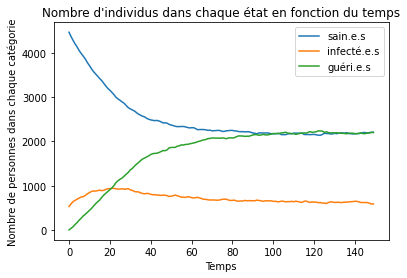

Sains :  44.22 % -- Infectés :  11.76 % -- Guéris :  44.02 %
Nombre d'individus I : 940 -- Le temps de production du pic : 21


In [54]:
modif = GenerateRandomPopulation(5000,C,150,Π0)
graph(modif,150)
proportion(modif,150,5000)
pic(modif,150,"I")

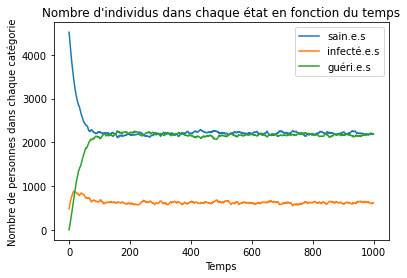

Sains :  43.72 % -- Infectés :  12.4 % -- Guéris :  43.88 %
Nombre d'individus I : 883 -- Le temps de production du pic : 17


In [55]:
modifGrand = GenerateRandomPopulation(5000,C,1000,Π0)
graph(modifGrand,1000)
proportion(modifGrand,1000,5000)
pic(modifGrand,1000,"I")

Si on augmente la probabilité pour un individu sain de devenir infecté

In [56]:
D = np.array([[0.80,0.20,0],[0,0.93,0.07],[0.02,0,0.98]])
print(D)

[[0.8  0.2  0.  ]
 [0.   0.93 0.07]
 [0.02 0.   0.98]]


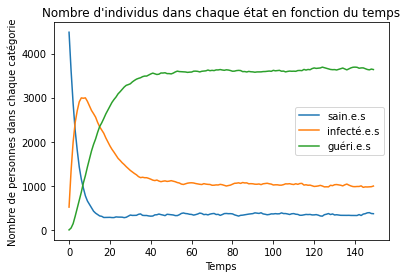

Sains :  7.36 % -- Infectés :  19.9 % -- Guéris :  72.74 %
Nombre d'individus I : 2995 -- Le temps de production du pic : 8


In [57]:
modifD = GenerateRandomPopulation(5000,D,150,Π0)
graph(modifD,150)
proportion(modifD,150,5000)
pic(modifD,150,"I")

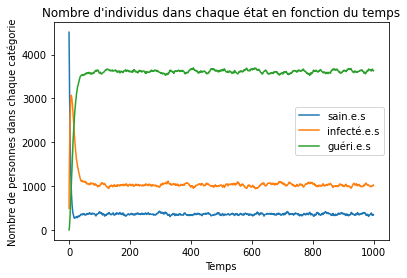

Sains :  6.94 % -- Infectés :  20.48 % -- Guéris :  72.58 %
Nombre d'individus I : 3073 -- Le temps de production du pic : 7


In [58]:
modifGrandD = GenerateRandomPopulation(5000,D,1000,Π0)
graph(modifGrandD,1000)
proportion(modifGrandD,1000,5000)
pic(modifGrandD,1000,"I")

# Question 2
Même question si vous changez la probabilité pour un individu guéri de redevenir sain.


Si on diminue la probabilité pour un individu guéri de redevenir sain

In [59]:
E = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.01,0,0.99]])
print(E)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.01 0.   0.99]]


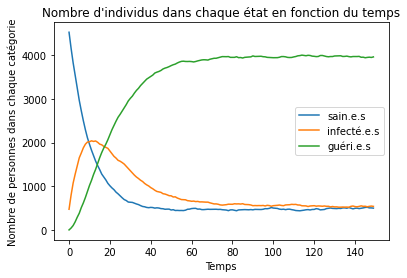

Sains :  9.98 % -- Infectés :  10.78 % -- Guéris :  79.24 %
Nombre d'individus I : 2040 -- Le temps de production du pic : 11


In [60]:
modifE = GenerateRandomPopulation(5000,E,150,Π0)
graph(modifE,150)
proportion(modifE,150,5000)
pic(modifE,150,"I")

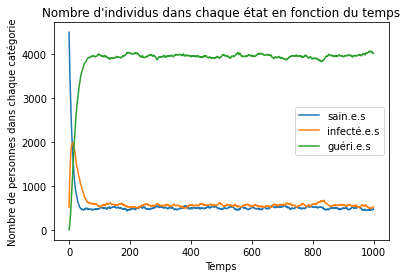

Sains :  9.48 % -- Infectés :  10.44 % -- Guéris :  80.08 %
Nombre d'individus I : 1973 -- Le temps de production du pic : 11


In [61]:
modifGrandE = GenerateRandomPopulation(5000,E,1000,Π0)
graph(modifGrandE,1000)
proportion(modifGrandE,1000,5000)
pic(modifGrandE,1000,"I")

Si on augmente la probabilité pour un individu guéri de redevenir sain

In [62]:
F = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.10,0,0.90]])
print(F)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.1  0.   0.9 ]]


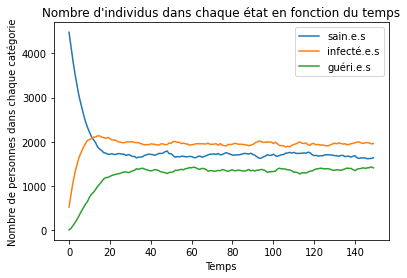

Sains :  32.7 % -- Infectés :  39.18 % -- Guéris :  28.12 %
Nombre d'individus I : 2134 -- Le temps de production du pic : 14


In [63]:
modifF = GenerateRandomPopulation(5000,F,150,Π0)
graph(modifF,150)
proportion(modifF,150,5000)
pic(modifF,150,"I")

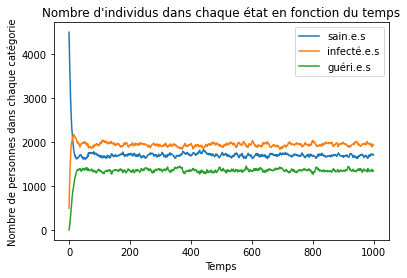

Sains :  34.42 % -- Infectés :  38.66 % -- Guéris :  26.92 %
Nombre d'individus I : 2175 -- Le temps de production du pic : 15


In [64]:
modifGrandF = GenerateRandomPopulation(5000,F,1000,Π0)
graph(modifGrandF,1000)
proportion(modifGrandF,1000,5000)
pic(modifGrandF,1000,"I")

In [65]:
G = np.array([[0.92,0.08,0],[0,0.93,0.07],[0.20,0,0.80]])
print(G)

[[0.92 0.08 0.  ]
 [0.   0.93 0.07]
 [0.2  0.   0.8 ]]


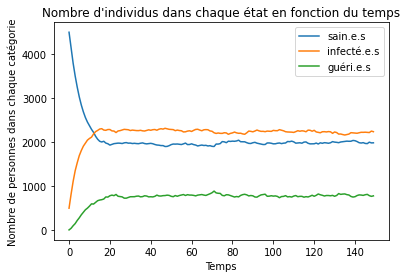

Sains :  39.7 % -- Infectés :  44.78 % -- Guéris :  15.52 %
Nombre d'individus I : 2316 -- Le temps de production du pic : 47


In [66]:
modifG = GenerateRandomPopulation(5000,G,150,Π0)
graph(modifG,150)
proportion(modifG,150,5000)
pic(modifG,150,"I")

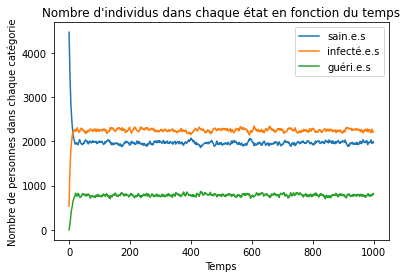

Sains :  39.44 % -- Infectés :  44.2 % -- Guéris :  16.36 %
Nombre d'individus I : 2347 -- Le temps de production du pic : 607


In [67]:
modifGrandG = GenerateRandomPopulation(5000,G,1000,Π0)
graph(modifGrandG,1000)
proportion(modifGrandG,1000,5000)
pic(modifGrandG,1000,"I")

# 4 Confinement
# Question 1
 Maintenant nous allons alterner entre les périodes de non distanciation et de distanciation.
1. En période de non-confinement, nous utilisons la matrice de transition de l’exercice précédent ;
2. En période de confinement, la probabilité de devenir infecté pour un individu sain devient nulle
— Commencez les simulations avec la matrice de transition de l’exercice précédent. On peut considérer qu’au temps initial tous les individus sont sains.
— Quand il y a 25% d’individus infectés dans la population, nous passons en période de distanciation
— Le nombre d’individus infectés va décroître. Quand il y a moins de 10% d’infectés, le confinement
est levé.


In [68]:
def pick(p, list_AZ,list_SZ):
    """
    Elle choisit l'état prochain en se basant sur la probabilité générer et la liste extraite de la matrice.
     list_AZ : la liste complete extraite de la matrice; tab[float]
     list_SZ : la liste list_AZ sans les zeros; tab[float] 
    """
    repetitions = Counter(list_SZ) #un dictionnaire où nous mettons les valeurs de la liste avec leurs repetitions 
    # Exemple : [0.5 0.5 0] -> {0.5 : 2 , 0 : 1}
    minimum = min(list_SZ) 
    list_min = [cpt for cpt, n in enumerate(list_AZ) if n == minimum] # Nous mettons toutes ses positions dans une liste 

    if (p > 0) and (p <= (minimum * 100)) : # Exemple [0.91 0.08 0.01] P devra etre entre 0 et 0.01*100=10%
        if repetitions[minimum] > 1 :
            index = list_min[0] 
        else :    
            index = list_AZ.index(minimum) 
                                            
        return index 
        
    list_SZ.remove(minimum) 
    minimum2 = min(list_SZ) 
    
    list_min2 = [cpt for cpt, n in enumerate(list_AZ) if n == minimum2]
    
    if (p > minimum) and (p <= (minimum * 100 + minimum2 * 100)) :
        if repetitions[minimum2] > 1 : 
            if list_min2 == list_min : 
                index = list_min[1] 
            else :
                index = list_min2[0]   
        else :
            index = list_AZ.index(minimum2)
        return index
        
    list_SZ.remove(minimum2)
    reste = list_SZ[0]
    
    list_reste = [cpt for cpt, n in enumerate(list_AZ) if n == reste]
    
    if (p > (minimum * 100 + minimum2 * 100)) and (p <= 100) :
        if repetitions[reste] > 1 : 
            if list_reste == list_min2 :
                if  list_min2 != list_min : 
                    index = list_min2[1]
                else :
                    index = list_min2[2]
            elif liste_reste == liste_min :
                if liste_min != liste_min2 :
                    index = liste_min[1]
                else :
                    index = liste_min[2]
        else :
            index = list_AZ.index(reste)
    
    return index

In [69]:
def chooseState(p,distrib_prob):
    """
    Trouve l'état initial choisi a travers de la probabilité aléatoire et la distribution initiale des probabilités.
    """    
    list_SZ = [s for s in distrib_prob if s != 0] # la liste de la matrice des distributions initial sans les 0 
    i = pick(p, distrib_prob, list_SZ)
    return i

In [70]:
def nextState(pre,p,matrice):
    """
    Trouve l'etat suivant a partir de : l'etat precedent, la probabilité aléatoire et la matrice des transitions.
    """
    matrix = deepcopy(matrice) 
    list_AZ = [s for s in matrix[pre]] #nous prenons la liste avec l'indice du precedent 
    list_SZ = [s for s in matrix[pre] if s != 0] # la liste de la matrice avec l'indice du precedent sans les 0 .
    i = pick(p,list_AZ,list_SZ)
    return i

In [71]:
def confinement(population,t,distrib_prob,matrice_conf,matrice_deconf):
    """
    Cette fonction merge et construit d'avantage sur les deux fonctions GenerateRandomPS (tirage aléatoire des états pour
    une séquence ) et GenerateRandomSequence (modélisation d'une population) en sorte qu'elle puisse 
    alterner entre les périodes et permuter entre les deux matrices confinement/déconfinement en fonction 
    des pourcentages pour trouver les états suivant
    """
    #dictionnaire des individus, clé l'index de l'invididu son numéro perso, valeur c'est la valeur qui correspond a l'état
    #la valeur de l'etat est importante parce que nous avons besoin besoin d'elle lorsque nous choisissons l'etat suivant
    #pour chaque individu
    indiv = dict()
    for ind in range(population):
        indiv = {ind : 0}
    
    #dictionnaire SIR pour trouver après les états correspondant a leurs valeurs
    SIR = {0 : "S", 1 : "I", 2 : "R"}
    random_sequence = ""
    # Initialisation du dictionnaire des états dict[int : dict[str:int]] .
    states = dict()  
    for i in range(t): 
        states[i] = {"S":0, "I":0, "R":0} 
       
    #les états initaux
    #a chaque tour de boucle sur population nous refons le calcul de proba aléa pour choisir l'etat initial de chaque
    #individu a partir de la distributions des probas initial et nous incrémentons le nombre des individus qui 
    #ont cette état dans le dictionnaire des état states
    for individu in range(population):
        proba = np.random.randint(0,100)
        while proba == 0 : 
            proba = np.random.randint(0,100)
        i = chooseState(proba,distrib_prob)
        indiv[individu] = i #nous indiquons que cet individu spécifique posséde cet état spécifique 
        statecase = SIR.get(i) #nous trouvons l'état qui correspond a la valeur a partir du dictionnaire SIR
        #incrementation
        if statecase == "S": 
            states[0]["S"] += 1 
        elif statecase == "I": 
            states[0]["I"] += 1 
        elif statecase == "R":
            states[0]["R"] += 1 
        
    # Boucle de 1 jusqu'au length de random sequence (1 parce que 0 est l'etat initial qui est déjà fini, 
    # et t = length de random sequence) , après,  boucle imbriqué sur la population pour trouver l'etat de 
    # chaque individu et faire des pourcentages précis pour savoir s'il faut se confiner/rester confiner (pourcentage 
    # infectés >= 25 sans confinement ou >=10 pendant le confinement)
    
    confinement = False
    
    for etat_i in range(1,t): 
        
        perc = percentage(states[etat_i - 1]["I"],population)
        
        for individu in range(population):
            if (perc >= 25) or ((perc >= 10) and (confinement)):
                confinement = True
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextState(indiv[individu],proba,matrice_conf)
                indiv[individu] = i          
            elif (perc < 10) and (confinement):
                confinement = False
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextState(indiv[individu],proba,matrice_deconf)
                indiv[individu] = i 
            else:
                proba = np.random.randint(0,100)
                while (proba == 0) : 
                    proba = np.random.randint(0,100)

                i = nextState(indiv[individu],proba,matrice_deconf)
                indiv[individu] = i 
    
            statecase = SIR.get(i)
            if statecase == "S": 
                states[etat_i]["S"] += 1 
            elif statecase == "I": 
                states[etat_i]["I"] += 1 
            elif statecase == "R":
                states[etat_i]["R"] += 1
                
    return states

# Question 2
Faites les simulations pour une population assez grande, représentez l’évolution du nombre d’individus à chaque temps t (vous devriez voir des “vagues”), et notez les temps de confinement et de
deconfinement

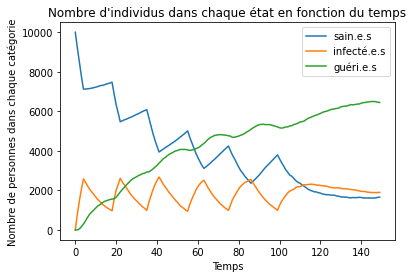

Sains :  16.57 % -- Infectés :  18.97 % -- Guéris :  64.46 %
Nombre d'individus I : 2679 -- Le temps de production du pic : 41


In [72]:
Π0_confi = [1,0,0]
H = np.array([[1,0,0],[0,0.93,0.07],[0.02,0,0.98]])
confi = confinement(10000,150,Π0_confi,H,B)
graph(confi,150)
proportion(confi,150,10000)
pic(confi,150,"I")

On a eu 5 confinement qui corresponde au pic des infecté lorsqu'ils sont supérieurs à 2500. A partir de t = 120 la situation se stabilise, il n'y a plus de confinement/déconfinement.

# 5 Optionnel
# Question 1
Vous pouvez maintenant modifier le(s) modèle(s) pour étudier différents cas de figure :
— la taille de la population ;
— la distribution de probabilité initiale ;
— les probabilités de transition pour voir comment cela va affecter la propagation de l’épidémie.


# Question 2
Quelles remarques critiques pouvez faire sur les modèles utilisés ?



- On ne prend pas en compte des personnes infectées non-infectieuses.
- On ne prend pas en compte des décès.
- On ne prend pas en compte des mutations possible du virus
- On ne prend pas en compte des hospitalisation possible causé par le virus
- On ne prend pas en compte que la population n'est pas homogène, qu'il y a des catégories pour lesquelles la mortalité est plus élevée.
- On ne prend pas en compte de la distribution spatiale de l'épidémie. Il peut y avoir plus de personnes infectées dans une région que dans une autre, que le virus puisse se diffuser d'une région à l'autre.

# Question3
Proposez des améliorations et implémentez-les si possible